## 人脸识别实验

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_lfw_people

In [3]:
faces = fetch_lfw_people(min_faces_per_person=10)
# 已经离线导入了人脸的数据集了！

In [4]:
"""
人脸数据集包含了如下元素：
- data: 描述人脸的数据集
- image: 描述人脸的图像
- target: 对应的标签
- target_names: 标签对应的人物名字

"""
faces.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [5]:
print('人脸主人的名字数组：')
print(faces.target_names)
print()
print('人脸主人的种类数：')
print(len(faces.target_names))

人脸主人的名字数组：
['Abdullah Gul' 'Adrien Brody' 'Alejandro Toledo' 'Alvaro Uribe'
 'Amelie Mauresmo' 'Andre Agassi' 'Andy Roddick' 'Angelina Jolie'
 'Ann Veneman' 'Anna Kournikova' 'Ari Fleischer' 'Ariel Sharon'
 'Arnold Schwarzenegger' 'Atal Bihari Vajpayee' 'Bill Clinton'
 'Bill Gates' 'Bill McBride' 'Bill Simon' 'Britney Spears' 'Carlos Menem'
 'Carlos Moya' 'Catherine Zeta-Jones' 'Charles Moose' 'Colin Powell'
 'Condoleezza Rice' 'David Beckham' 'David Nalbandian' 'Dick Cheney'
 'Dominique de Villepin' 'Donald Rumsfeld' 'Edmund Stoiber'
 'Eduardo Duhalde' 'Fidel Castro' 'George HW Bush' 'George Robertson'
 'George W Bush' 'Gerhard Schroeder' 'Gloria Macapagal Arroyo'
 'Gonzalo Sanchez de Lozada' 'Gordon Brown' 'Gray Davis' 'Guillermo Coria'
 'Halle Berry' 'Hamid Karzai' 'Hans Blix' 'Harrison Ford'
 'Hillary Clinton' 'Howard Dean' 'Hu Jintao' 'Hugo Chavez' 'Ian Thorpe'
 'Igor Ivanov' 'Jack Straw' 'Jackie Chan' 'Jacques Chirac' 'Jacques Rogge'
 'James Blake' 'James Kelly' 'Jason Kidd' 'Jav

In [6]:
print(faces.images.shape, faces.data.shape)
# data 就是把 image 里面的矩阵给打散，形成一个 2914 维的列向量

(4324, 62, 47) (4324, 2914)


In [7]:
random_indexes = np.random.permutation(len(faces.data))
Xx = faces.data[random_indexes]
example_faces = Xx[:4,:]

example_faces.shape
# 从中抽出四个脸，举个例子

(4, 2914)

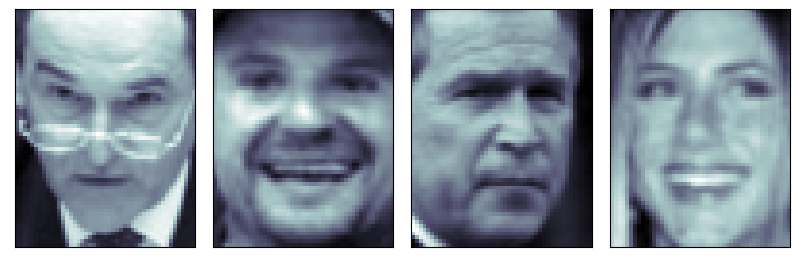

In [8]:
def plot_faces(faces):
    
    fig, axes = plt.subplots(1, 4, figsize=(10, 10),
                         subplot_kw={'xticks':[], 'yticks':[]},
    gridspec_kw=dict(hspace=0.1, wspace=0.1)) 
    for i, ax in enumerate(axes.flat):
        ax.imshow(faces[i].reshape(62, 47), cmap='bone')
    plt.show()
    
plot_faces(example_faces)

### 直接KNN识别模型

In [9]:
X = faces.data
y = faces.target

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# 训练测试数据集分离

In [23]:
from sklearn.svm import SVC

#使用SVC作为模型
clf = SVC(kernel="linear")
#训练
clf.fit(X_train, y_train)
#预测
y_predict = clf.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_predict))

0.5196304849884527


### 特征脸识别模型

In [25]:
%%time
from sklearn.decomposition import PCA 
pca = PCA(svd_solver='randomized')
pca.fit(X)

Wall time: 5.4 s


PCA(svd_solver='randomized')

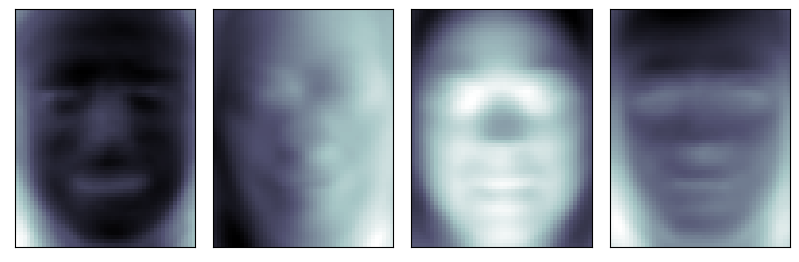

In [27]:
plot_faces(pca.components_[:4,:])

In [28]:
X_train_reduc = pca.transform(X_train)
X_test_reduc  = pca.transform(X_test)

ValueError: Expected 2D array, got 1D array instead:
array=[ 29.  35.  35. ...  18. 137.  12.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.